# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.17.1 opencv-python mediapipe sklearn matplotlib 

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
#mp_face_mesh = mp.solutions.face_mesh

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    #mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    """
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
        

    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )
    """
    # Draw left hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )

    # Draw right hand connections  
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image,results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


e:\python\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.right_hand_landmarks.landmark)

21

In [8]:
results.face_landmarks

landmark {
  x: 0.768666744
  y: 0.603768528
  z: -0.0263136476
}
landmark {
  x: 0.766082227
  y: 0.561068654
  z: -0.0501889735
}
landmark {
  x: 0.765480518
  y: 0.574506104
  z: -0.0259974524
}
landmark {
  x: 0.752556384
  y: 0.524753213
  z: -0.0394813269
}
landmark {
  x: 0.765007675
  y: 0.54884243
  z: -0.0536513478
}
landmark {
  x: 0.762703061
  y: 0.533542752
  z: -0.0502654
}
landmark {
  x: 0.756392896
  y: 0.497365445
  z: -0.0259435941
}
landmark {
  x: 0.685581684
  y: 0.508372068
  z: 0.00364420423
}
landmark {
  x: 0.752958477
  y: 0.469954
  z: -0.0206925664
}
landmark {
  x: 0.751528859
  y: 0.45351243
  z: -0.0231569633
}
landmark {
  x: 0.744337261
  y: 0.39087984
  z: -0.0144829042
}
landmark {
  x: 0.769187152
  y: 0.609939754
  z: -0.0248498544
}
landmark {
  x: 0.769209206
  y: 0.614378572
  z: -0.0215189662
}
landmark {
  x: 0.768748
  y: 0.6159904
  z: -0.0171321705
}
landmark {
  x: 0.769208312
  y: 0.618080139
  z: -0.0166208129
}
landmark {
  x: 0.769951

In [9]:
draw_styled_landmarks(image, results)

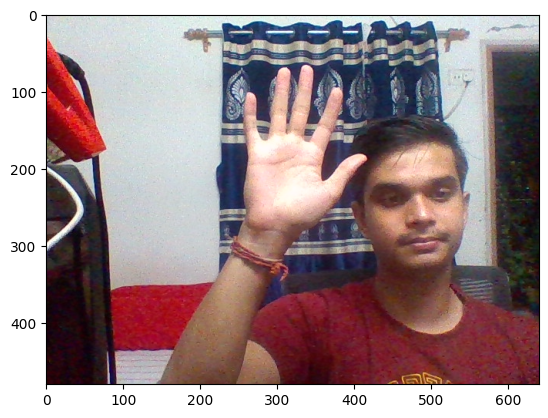

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [136]:
"""pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

SyntaxError: incomplete input (474693489.py, line 1)

In [11]:
#pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
"""face = ( np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)
)  


In [12]:
def extract_keypoints(results):
    #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [13]:
result_test = extract_keypoints(results)

In [14]:
result_test

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [142]:
468*3+33*4+21*3+21*3

1662

In [15]:
np.save('0', result_test)

In [16]:
np.load('0.npy')

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

# 4. Setup Folders for Collection

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello','help','how','iLoveYou','no','thanks','where','why','yes','Danger','Doctor','hospital','Sorry'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [147]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [20]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [80]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [81]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}

In [23]:
label_map

{'hello': 0,
 'help': 1,
 'how': 2,
 'iLoveYou': 3,
 'no': 4,
 'thanks': 5,
 'where': 6,
 'why': 7,
 'yes': 8,
 'Danger': 9,
 'Doctor': 10,
 'hospital': 11,
 'Sorry': 12}

In [24]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
np.array(sequences).shape

(390, 30, 126)

In [26]:
np.array(labels).shape

(390,)

In [27]:
X = np.array(sequences)

In [28]:
X.shape

(390, 30, 126)

In [29]:
y = to_categorical(labels).astype(int)

In [30]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [32]:
y_test.shape

(20, 13)

# 7. Build and Train LSTM Neural Network

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [123]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [124]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

e:\python\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [125]:
res = [2.9, 7.55, 4.7]

In [126]:
actions[np.argmax(res)]

'help'

In [127]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [140]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - categorical_accuracy: 0.5490 - loss: 3.3935
Epoch 2/2000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - categorical_accuracy: 0.4365 - loss: 2.2220
Epoch 3/2000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.5611 - loss: 1.2806
Epoch 4/2000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.6740 - loss: 0.9674
Epoch 5/2000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 0.7882 - loss: 0.7784
Epoch 6/2000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - categorical_accuracy: 0.8135 - loss: 0.5914
Epoch 7/2000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - categorical_accuracy: 0.8457 - loss: 0.4853
Epoch 8/2000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - categorical_accuracy: 0.8622 - loss: 0.4715
Epoch 9/2000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - categorical_accuracy: 0.8010 - loss: 0.6592
Epoch 10/2000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - categorical_accuracy: 0.8628 - loss: 0.5325
Epoch 11/

KeyboardInterrupt: 

In [141]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │        48,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 13)             │           429 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 611,369 (2.33 MB)

 Trainable params: 203,789 (796.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,580 (1.55 MB)

# 8. Make Predictions

In [142]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [143]:
actions[np.argmax(res[1])]

'how'

In [144]:
actions[np.argmax(y_test[1])]

'how'

# 9. Save Weights

In [145]:
model.save('action.h5')

In [122]:
del model

In [146]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [147]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [148]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [149]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [150]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[18,  0],
        [ 0,  2]],

       [[19,  0],
        [ 0,  1]],

       [[18,  0],
        [ 1,  1]],

       [[17,  1],
        [ 0,  2]],

       [[18,  0],
        [ 0,  2]],

       [[16,  1],
        [ 0,  3]],

       [[17,  0],
        [ 0,  3]],

       [[19,  0],
        [ 0,  1]],

       [[18,  0],
        [ 0,  2]],

       [[18,  0],
        [ 1,  1]]], dtype=int64)

In [151]:
accuracy_score(ytrue, yhat)

0.9

# 11. Test in Real Time

In [152]:
colors = [(245,117,16), (117,245,16), (16,117,245), (255,0,0), (0,255,0),
    (0,0,255), (255,255,0), (255,0,255), (0,255,255), (100,100,100),
    (128,0,128), (0,128,128)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [79]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

IndexError: list index out of range

<Figure size 1800x1800 with 0 Axes>

In [156]:
import cv2
import numpy as np
from collections import deque, Counter

# --- Prediction Variables ---
sequence = []
sentence = []
predictions = deque(maxlen=10)  # Smooth over last 10 predictions
threshold = 0.8

# --- Start Webcam ---
cap = cv2.VideoCapture(0)

# --- Mediapipe model setup ---
with mp_holistic.Holistic(min_detection_confidence=0.5,
                          min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # --- Make Detections ---
        image, results = mediapipe_detection(frame, holistic)

        # --- Draw Landmarks (hands only) ---
        draw_styled_landmarks(image, results)

        # --- Extract Keypoints ---
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep latest 30 frames

        # --- Prediction ---
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_class = np.argmax(res)
            predictions.append(predicted_class)

            # Debug print (optional)
            print(f"{actions[predicted_class]}: {res[predicted_class]:.2f}")

            # --- Check for stable prediction ---
            most_common_pred, freq = Counter(predictions).most_common(1)[0]

            if freq > 7 and res[most_common_pred] > threshold:
                action = actions[most_common_pred]

                # Append if not repeated
                if len(sentence) == 0 or action != sentence[-1]:
                    sentence.append(action)

                # Limit sentence length
                sentence = sentence[-5:]

        # --- Display the sentence on top ---
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # --- Show Frame ---
        cv2.imshow('OpenCV Feed', image)

        # --- Exit on 'q' ---
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# --- Clean Up ---
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Doctor: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31m

In [114]:
cap.release()
cv2.destroyAllWindows()